# (Ford GoBike Trip Data Analysis)
## by (Moaz Taha)

## Preliminary Wrangling

> The data describes the rides made by the users of Ford Gobike service in February 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv("fordgobike-tripdata.csv")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# correct Dtype for start_time and end_time
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [6]:
df['start_time'].min(), df['start_time'].max()

(Timestamp('2019-02-01 00:00:20.636000'),
 Timestamp('2019-02-28 23:59:18.548000'))

In [7]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# checking the missing values in members' gender and birth year
df[df['member_gender'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.062,2019-03-01 00:04:21.867,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.503,2019-02-28 23:54:18.451,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.362,2019-02-28 23:38:14.363,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.853,2019-02-28 23:32:32.682,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.663,2019-02-01 01:42:36.878,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.366,2019-02-01 01:39:05.950,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.420,2019-02-01 01:23:37.645,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.641,2019-02-01 01:11:54.949,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [9]:
df[df['member_gender'].isna()].user_type.value_counts()

Subscriber    5028
Customer      3237
Name: user_type, dtype: int64

The hypothesis was that memebers with missing data would most likey be customers not subscribers as subscribers should have input their infromation to sign up for the service. But the data shows that these 2 things are not correlated. 

In [10]:
# drop missing values
original_df = df.copy()
df.dropna(inplace=True)

In [11]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Converting some features to more interpretable units 

In [12]:
# age instead of year of birth
df['member_age'] = 2019 - df['member_birth_year'] # 2019 as the data was collected in 2019
df.drop('member_birth_year', axis=1, inplace=True)

# minutes instead of seconds 
df['duration_min'] = df['duration_sec'] / 60
df.drop('duration_sec', axis=1, inplace=True)

# ids to int
df['start_station_id'] = df['start_station_id'].astype(int)
df['end_station_id'] = df['end_station_id'].astype(int)

df.head(5)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35.0,869.750000
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47.0,1030.900000
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30.0,608.166667
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45.0,26.416667
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60.0,29.883333


In [13]:
df.shape

(174952, 16)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  int64         
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_id           174952 non-null  int64         
 7   end_station_name         174952 non-null  object        
 8   end_station_latitude     174952 non-null  float64       
 9   end_station_longitude    174952 non-null  float64       
 10  bike_id                  174952 non-null  int64         
 11  user_type                174952 non-null  object        
 12  member_gender   

In [15]:
original_df.shape

(183412, 16)

### What is the structure of your dataset?

> the dataset contains 183412 rides (174952 after removing NaNs) data and member related data:
 - `start_time`, `end_time`: the starting and ending time of the ride.
 - `start_station_id`, `end_station_id`: the id of the starting and ending stations.
 - `start_station_name`, `end_station_name`: the name of the starting and ending stations.
 - `start_station_latitude`, `end_station_latitude`, `start_station_longitude`, `end_station_longitude`: the latitude and longitude of the starting and ending stations.
 - `bike_id`: the id of the bike used in the ride.
 - `user_type`: the type of the member (Subscriber / Customer).
 - `member_gender`: the gender of the member.
 - `bike_share_for_all_tripe`: if the user is enroled in the program for low income residents.
 - `member_birth_year`: the birth year of the user -> replaced by `member_age` the actual age of the user.
 - `duration_sec`: the duration of the rides in seconds -> replaced by `duration_min` the duration in minutes.

### What is/are the main feature(s) of interest in your dataset?

> The main feature thing I'm interested in is the rides themselves. When and why does people ride, which stations has the most traffic and why? the average ride duration?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the locations of the starting and ending stations should have the biggest effect, also the starting and ending times as some hours of the day has more traffic than others which may also has an effect. The type of the user, gender and age could also have an effect.
 - `start_station_name`, `end_station_name`
 - `duration_min`, `member_gender`, `member_age`, `user_type`

## Univariate Exploration

In [16]:
# drop the features I won't be using 
drop_features = ['bike_id', 'end_station_latitude', 'start_station_latitude', 'end_station_longitude', 'start_station_longitude']
df.drop(drop_features, axis=1, inplace=True)

### Ride Duration Distrubtion 

In [17]:
df['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [18]:
np.log10(df['duration_min'].describe())

count    5.242919
mean     1.069423
std      1.437276
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: duration_min, dtype: float64

In [19]:
bins = 10 ** np.arange(0, 3.1+.1, .1)
ticks = [1, 2, 3, 5, 7, 12, 20, 40, 60, 100, 200, 500, 1400]
labels = ["{}".format(v) for v in ticks]

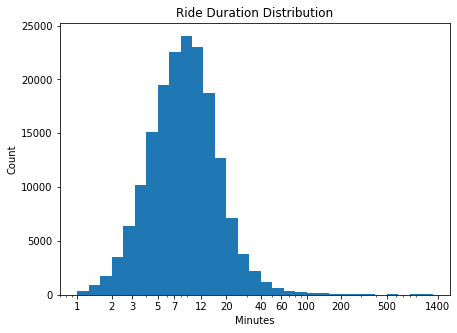

In [20]:
plt.figure(figsize=(7, 5))
plt.hist(data=df, x='duration_min', bins=bins)
plt.title("Ride Duration Distribution")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.xscale("log")
plt.xticks(ticks, labels)
plt.show()

The duration data was really skewed to the right so I applied a log scaling to it and it follows a log normal distribution. We can see that most of the rides lasts between 7-12 minutes.

Also a few number of rides were above 100 minutes and going way up till 1400, as these rides are a few and not rare so I don't think they are errors in the data, they may be some long distance marathons or organized events or that some people kept the bikes with them overnight.

### Members
- Gender
- Age
- Type

#### Members Gender Distribution 

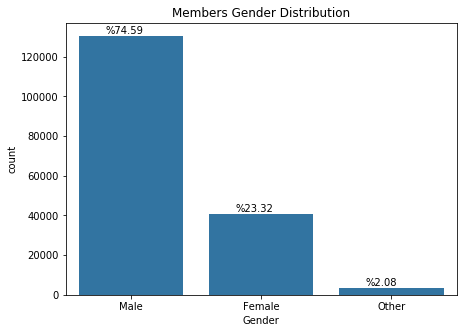

In [21]:
# gender distribution
plt.figure(figsize=(7, 5))
color = sb.color_palette()[0]
ax = sb.countplot(data=df, x='member_gender', order=["Male", "Female", "Other"], color=color)
plt.title("Members Gender Distribution")
for p in ax.patches:
        ax.annotate('%{:.2f}'.format(p.get_height() / df.shape[0] * 100), (p.get_x()+0.2, p.get_height()+1000))
    
plt.xlabel("Gender")
plt.show()

most of the rides were made by males 74.59% and 23.32% by females and only 2% by other.

#### Members Age Disribution 

In [22]:
df['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

In [23]:
df['member_age'].sort_values(ascending=False)[:10]

27370     141.0
60960     119.0
21506     119.0
94326     119.0
122194    119.0
41319     119.0
58222     119.0
38932     119.0
19375     119.0
107619    119.0
Name: member_age, dtype: float64

In [24]:
df[df['member_age'] == 141]

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_gender,bike_share_for_all_trip,member_age,duration_min
27370,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,386,24th St at Bartlett St,Customer,Female,No,141.0,24.566667


In [25]:
bins = np.arange(18, 141, 2)
ticks = [18, 20, 25, 30, 35, 40, 50, 60, 70, 100, 120, 140]
labels = ["{}".format(v) for v in ticks]

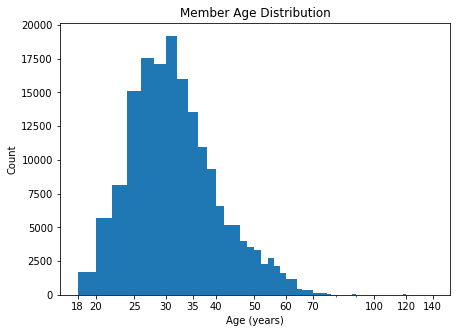

In [26]:
plt.figure(figsize=(7, 5))
plt.hist(data=df, x='member_age', bins=bins)
plt.xscale("log")
plt.xticks(ticks, labels)
plt.title("Member Age Distribution")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

The data has close to log normal disribution with some points skewed the right.
Most of the members are between age 25 to 35 and we can see that the service is only available to 18 years old or older.

We can also see that very a few rides were made by people older than 60. 

And We have some some really high ages like 119 and 141 and these may be some mistakes made by the users like typing 141 instead of 41 or someone joking. But still the rest of the information can be used.

#### Members Type Distribution 

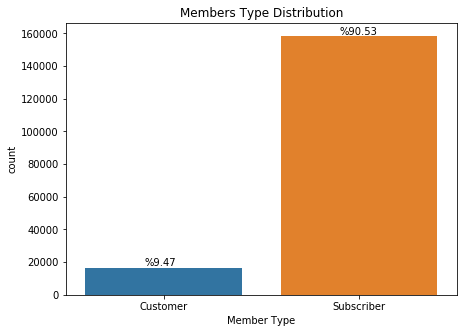

In [27]:
# user type distribution
plt.figure(figsize=(7, 5))
ax = sb.countplot(data=df, x='user_type')
plt.title("Members Type Distribution")
for p in ax.patches:
        ax.annotate('%{:.2f}'.format(p.get_height() / df.shape[0] * 100), (p.get_x()+0.3, p.get_height()+1000))
    
plt.xlabel("Member Type")
plt.show()

The majority of the rides are made by subscribers to the service, This may affect the duration as these people use the service regulary and may be familiar with the roads and routes.

### Stations Distributions 
- Starting Stations - Top 10
- Ending Stations - Top 10

In [28]:
top_10_starting_ids = df['start_station_id'].value_counts().reset_index()[:10]['index'].values
top_10_starting = df[df['start_station_id'].isin(top_10_starting_ids)]
top_10_starting_order = top_10_starting.start_station_name.value_counts().index

top_10_ending_ids = df['end_station_id'].value_counts().reset_index()[:10]['index'].values
top_10_ending = df[df['end_station_id'].isin(top_10_ending_ids)]
top_10_ending_order = top_10_ending.end_station_name.value_counts().index

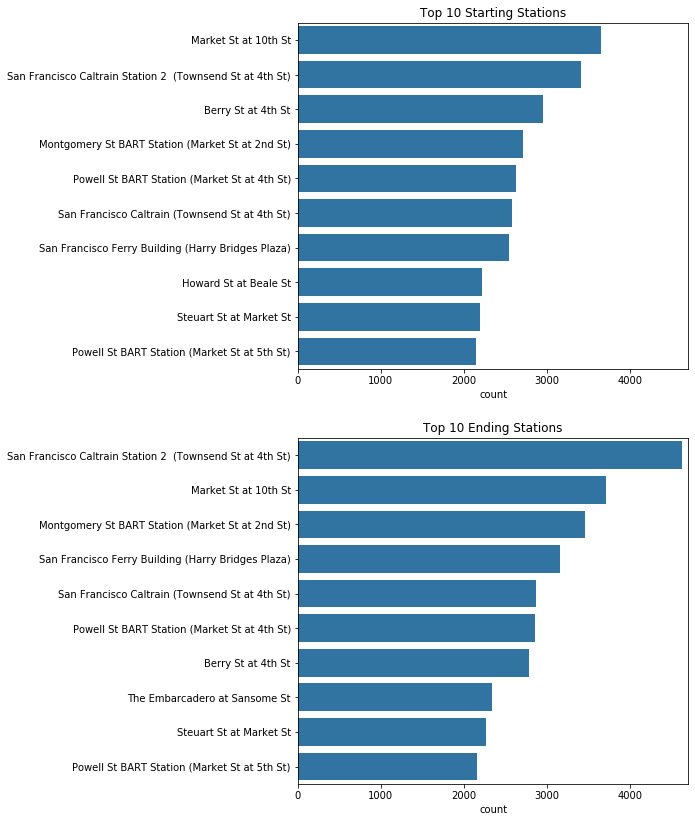

In [29]:
plt.figure(figsize=(7, 14))
plt.subplot(2, 1, 1)
plt.title("Top 10 Starting Stations")
sb.countplot(data=top_10_starting, y='start_station_name', color=color, order=top_10_starting_order)
plt.ylabel(None)
plt.xlim((0, 4700))


plt.subplot(2, 1, 2)
plt.title("Top 10 Ending Stations")
sb.countplot(data=top_10_ending , y='end_station_name', color=color, order=top_10_ending_order)
plt.ylabel(None)
plt.xlim((0, 4700))
plt.show()

In [30]:
# stations with the most traffic (start/end)
intersection_stations = list(set(top_10_ending_ids) & set(top_10_starting_ids))
df[df['start_station_id'].isin(intersection_stations)].start_station_name.unique()

array(['Montgomery St BART Station (Market St at 2nd St)',
       'Market St at 10th St',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 5th St)',
       'Steuart St at Market St',
       'Powell St BART Station (Market St at 4th St)',
       'Berry St at 4th St'], dtype=object)

We can see that stations like `San Francisco Caltrain Station 2` and `Market St` has the most traffic whether it's starting or ending. The same goes for the rest of the top 10 starting and ending lists. which means that these are the most active stations. This could indicate that people who leave from a station come back to it again. This can be the case for people who commute to and back from work everyday.

### Time
- Days of the week
- Hours of the day

In [31]:
df['start_hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day
df['start_day_name'] = df['start_time'].dt.day_name()

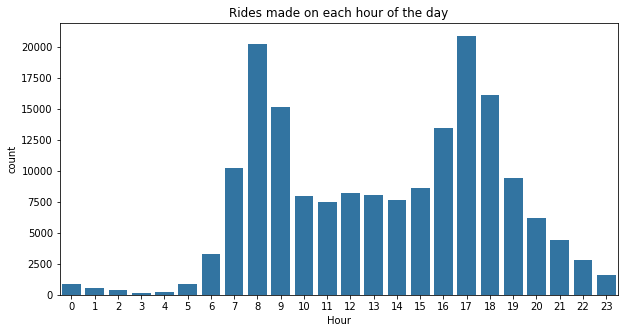

In [32]:
plt.figure(figsize=(10, 5))
sb.countplot(data=df, x='start_hour', color=color)
plt.title("Rides made on each hour of the day")
plt.xlabel("Hour")
plt.show()

As we can see the data is bimodal around 2 specific hours 8 and 17. This shows us that a really big number people use the service to go to or come back from work which supports the previous claim.

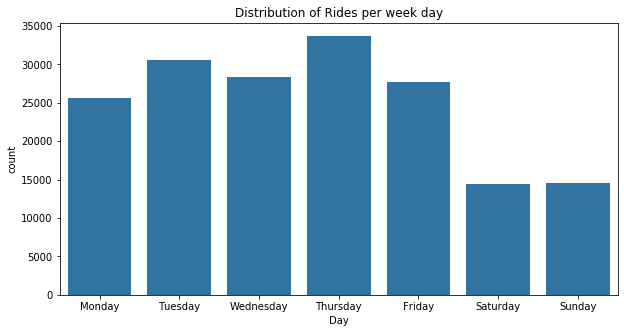

In [33]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 5))
sb.countplot(data=df, x='start_day_name', color=color, order=days_order)
plt.title("Distribution of Rides per week day")
plt.xlabel("Day")
plt.show()

This plot also supports our hypothesis as the number of rides on Saturday and Sunday (weekend) is noticably smaller than the number of rides for the other days. But at the same time we can see that there still a good number of people that use the service on weekends too.

## Bivariate Exploration

### Durations and Starting Stations

In [34]:
lowest_50_starting_ids = df['start_station_id'].value_counts().reset_index()[-50:]['index'].values
lowest_50_starting = df[df['start_station_id'].isin(lowest_50_starting_ids)]
lowest_50_starting_order = lowest_50_starting.start_station_id.value_counts().index

top_50_starting_ids = df['start_station_id'].value_counts().reset_index()[:50]['index'].values
top_50_starting = df[df['start_station_id'].isin(top_50_starting_ids)]
top_50_starting_order = top_50_starting.start_station_id.value_counts().index

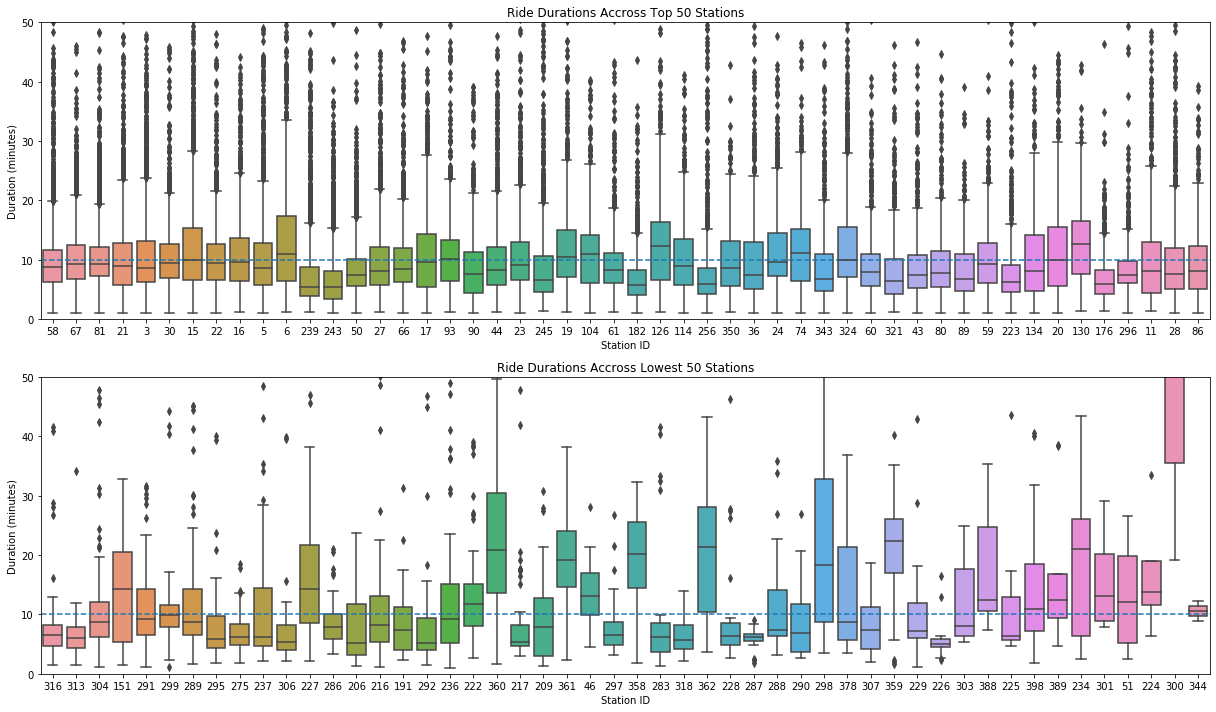

In [35]:
ticks = [1, 5, 7, 12, 20, 30]
labels = [f"{v}" for v in ticks]

plt.figure(figsize=(17, 10))
plt.subplot(2, 1, 1)
plt.title("Ride Durations Accross Top 50 Stations")
sb.boxplot(data=top_50_starting, x='start_station_id', y='duration_min', order=top_50_starting_order)
plt.axhline(10, ls='--')
plt.ylim((0, 50))
plt.ylabel("Duration (minutes)")
plt.xlabel("Station ID")
#plt.yscale("log")
#plt.yticks(ticks, labels)

plt.subplot(2, 1, 2)
plt.title("Ride Durations Accross Lowest 50 Stations")
sb.boxplot(data=lowest_50_starting, x='start_station_id', y='duration_min', order=lowest_50_starting_order)
plt.axhline(10, ls='--')
plt.ylim((0, 50))
plt.ylabel("Duration (minutes)")
plt.xlabel("Station ID")
#plt.yscale("log")
#plt.yticks(ticks, labels)

plt.tight_layout()

According to the first plot:
The durations of the rides that started from the top 50 stations are really close the average ride time 7-12 minutes. Which means that people that start their rides in these stations are most likey to have the average ride time.

On the other hand, according to the second plot the rides associated to stations with the least rides are more likey to have durations above or below the average ride duration. And have more varied durations.

This could mean that people choose these top stations because they have the ideal duration for them as these stations may be in busy traffic areas or closer to their work. And the least used stations may be too close or too far away from the users distanations which means walking or taking a taxi would be a better option.

### Durations and Gender

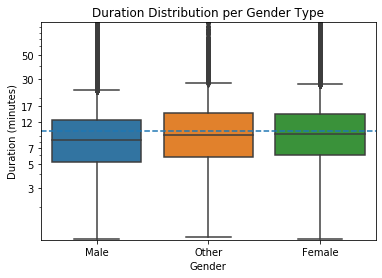

In [36]:
ticks = [3, 5, 7, 12, 17, 30, 50]
labels = [f"{v}" for v in ticks]

plt.title("Duration Distribution per Gender Type")
sb.boxplot(data=df, x='member_gender', y='duration_min')
plt.axhline(10, ls='--')
plt.yscale("log")
plt.ylim((1, 100))
plt.xlabel("Gender")
plt.ylabel("Duration (minutes)")
plt.yticks(ticks, labels)
plt.show()

We can see that men took shorter rides as women has longer rides durations than men as their minimum, maximum and median values are higher than men values. 

### Durations and User Type

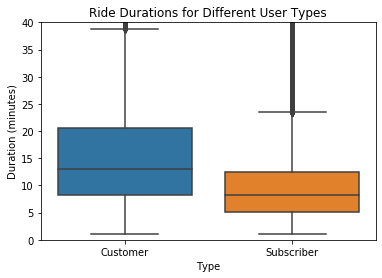

In [37]:
sb.boxplot(data=df, x='user_type', y='duration_min')
plt.ylim((0, 40))
plt.xlabel("Type")
plt.title("Ride Durations for Different User Types")
plt.ylabel("Duration (minutes)")
plt.show()

As we suspected earlier subscribers have shorter ride durations than customers. This maybe due to reasons like the subscribers do the same rides regularly, so they are more familiar with the roads and routes. Customers may use the service occasionally which means they are less familiar with the roads and routs and also they may have different starting and ending stations each ride instead of having fixed comutes.

### User Type and Days of the week 

In [38]:
color = sb.color_palette()[0]

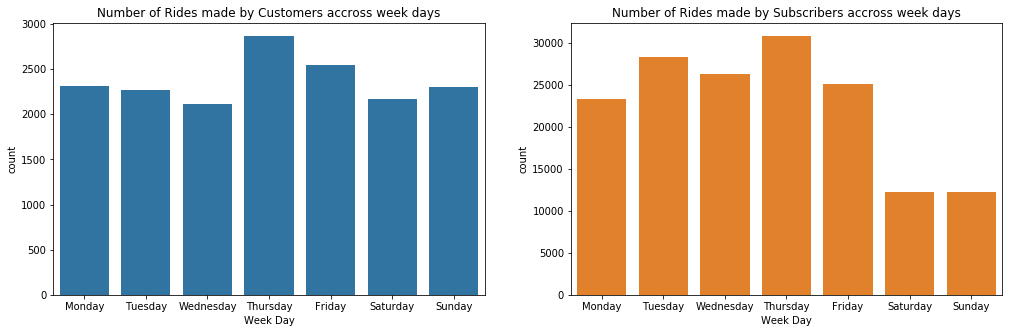

In [39]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(17, 5))
ax = plt.subplot(1, 2, 1)
plt.title("Number of Rides made by Customers accross week days")
sb.countplot(data=df[df['user_type'] == 'Customer'], x='start_day_name', hue='user_type', order=days_order)
ax.get_legend().remove()
plt.xlabel("Week Day")

ax = plt.subplot(1, 2, 2)
plt.title("Number of Rides made by Subscribers accross week days")
sb.countplot(data=df[df['user_type'] == 'Subscriber'], x='start_day_name', hue='user_type', order=days_order,
             palette={"C1"})
ax.get_legend().remove()
plt.xlabel("Week Day")
plt.show()

The number of rides by subscribers shows same low values for weekends which means most of the subscribers use the service to comute to and from work which should be a fixed comute (shorter durations). While customers' numbers are not affected by weekends which means the majority of the customers use the service occasionally and not only for fixed commutes like work.

### User Type and Hours of the day 

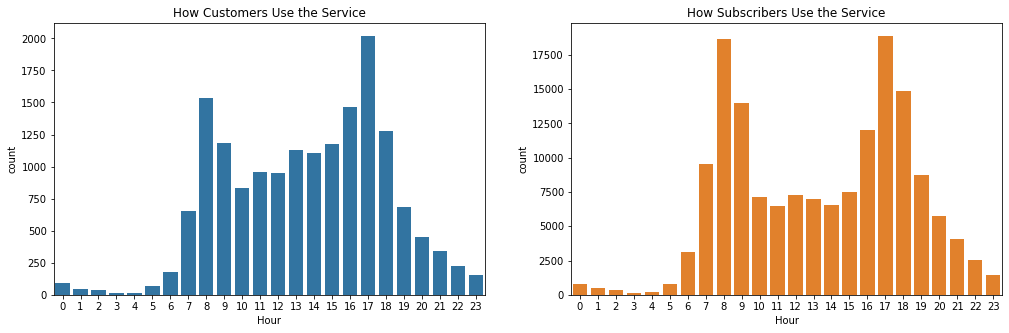

In [40]:
plt.figure(figsize=(17, 5))
ax = plt.subplot(1, 2, 1)
plt.title("When Customers Use the Service")
sb.countplot(data=df[df['user_type'] == 'Customer'], x='start_hour', hue='user_type')
ax.get_legend().remove()
plt.xlabel("Hour")

ax = plt.subplot(1, 2, 2)
plt.title("When Subscribers Use the Service")
sb.countplot(data=df[df['user_type'] == 'Subscriber'], x='start_hour', hue='user_type', palette={"C1"})
ax.get_legend().remove()
plt.xlabel("Hour")
plt.show()

Here we can see clearly that most of our subscribers use the service to comute to and from work.

And we can also see that most of the customers do the same. This maybe due to the fact that these rides can be from different customers on different days accross the month and it accumlated to be like this. We can also see the distribution of customer rides during the working hours 8-17 is quite different than subscribers which shows that customers use the service for other purposes than fixed commute.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Lets start with the relationship between duration and starting station, the stations with most traffic had a duration distribution centered around the center of all the durations distribution which indicates that people that use these stations have similiar commutes or they figured out that these rides durations are just ideal for them like if it's longer they can just take a taxi or if it's shorter they can just walk. We also found that subscribers have shorter commute duration than customers which when we invistigated a little bit more we found that subscribers mostly take rides to their commutes during working days and these tasks is repeatitive enough so they alreay know the best roads and routes which makes their rides shorter. On the other as some customers use the service for commuting they also use it more for other non-consistant rides which means they know little about the roads and routes which suggests longer periods. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Although the relationship between subscriber and hour of the day and customer and hour of the day was similar (bimodal), the distribution of rudes during working hours was different for customers suggesting that more customers took rides during the working hours than subscribers and this suggests that these customers may be different people taking rides for different purposes which made them have longer average rides than subscribers.

## Multivariate Exploration

### Durations, User Types, Days of the Week

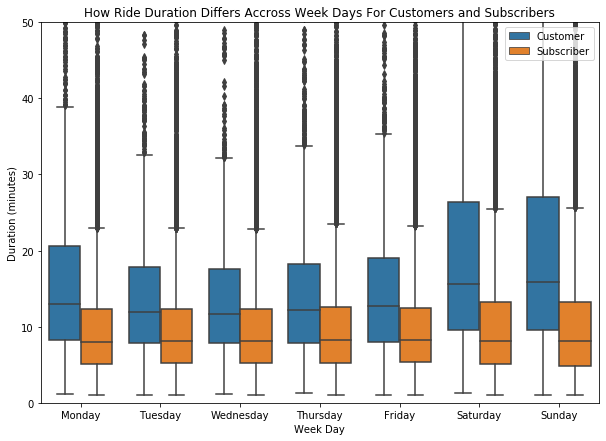

In [41]:
plt.figure(figsize=(10, 7))
sb.boxplot(data=df, x='start_day_name', y='duration_min', hue='user_type', order=days_order)
plt.title("How Ride Duration Differs Accross Week Days For Customers and Subscribers")
#plt.yscale("log")
plt.ylim((0, 50))
plt.xlabel("Week Day")
plt.ylabel("Duration (minutes)")
plt.legend(loc="upper right")
plt.show()

The previous results also appear here as subscribers have shorter ride durations than customers but we can also see that customer durations increase in the weekends these maybe people that are taking rides for riding events that are organized on the weekends but they still don't take rides regularly to commute or people that only takes rides on the weekends.

### Durations, User Types, Hours of the day

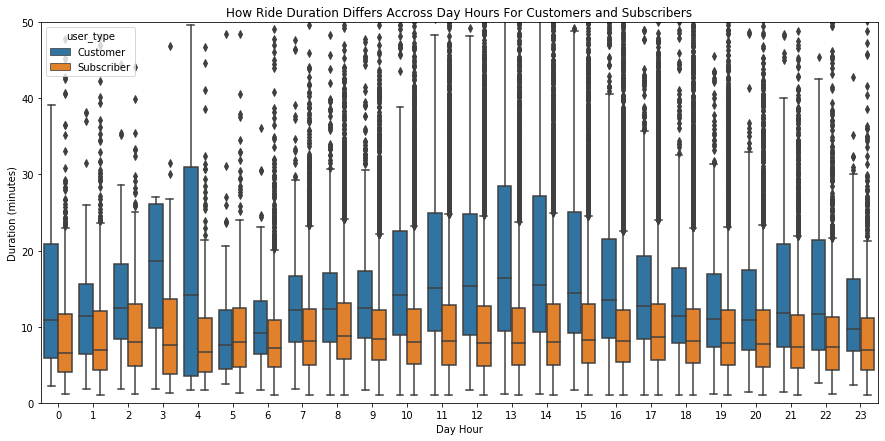

In [42]:
plt.figure(figsize=(15, 7))
plt.title("How Ride Duration Differs Accross Day Hours For Customers and Subscribers")
sb.boxplot(data=df, x='start_hour', y='duration_min', hue='user_type')
#plt.yscale("log")
plt.ylim((0, 50))
plt.xlabel("Day Hour")
plt.ylabel("Duration (minutes)")
plt.show()

As we can see the ride durations of subscribers are very similiar over the hours of the day which confirms our previous insights. But on the other hand the the ride durations of customers see a slight increase during the working hours this maybe because these rides are not from the same customers so it may just describe a trend of people who needs to do an argent ride during the working hours and there maybe be heavy traffic or something. 

### Durations, User Type and Top 10 Start Stations

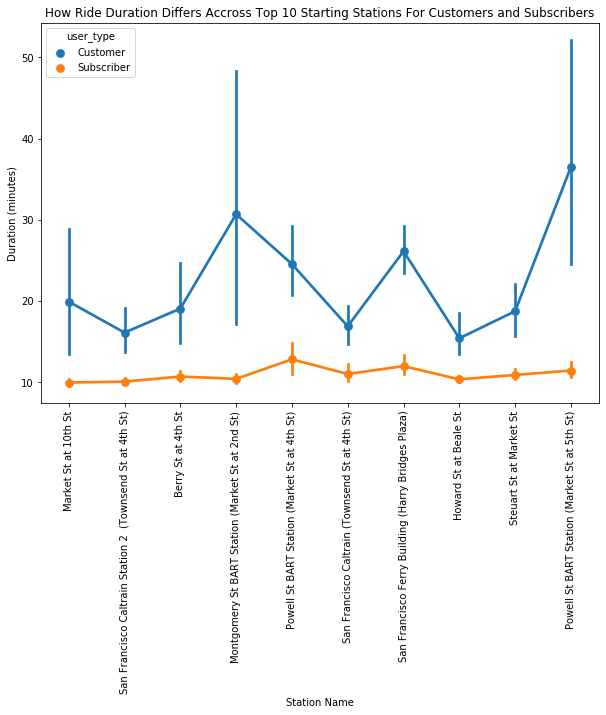

In [43]:
plt.figure(figsize=(10, 7))
plt.title("How Ride Duration Differs Accross Top 10 Starting Stations For Customers and Subscribers")
sb.pointplot(data=top_10_starting, x='start_station_name', y='duration_min', hue='user_type', order=top_10_starting_order)
plt.xticks(rotation=90)
plt.xlabel("Station Name")
plt.ylabel("Duration (minutes)")
plt.show()

As we can see for the stations with the top 10 most rides, The subscribers ride durations are still consistant accross stations with sometimes a slight increase. But on the other hand the customers ride durations varies a lot from one station to the other and with high variance in the data. 